### Project Name : Energy Customer Segmentation

##### Project Type - ML Case Study
##### Contribution   - Individual

### Project Statement Overview:

#### Business Overview: 


In the energy and utilities sector, understanding customer behavior is crucial for optimizing service delivery, improving customer satisfaction, and driving business growth. With the increasing adoption of smart meters and IoT devices, energy companies now have access to vast amounts of data on household energy consumption. However, without proper analysis, this data remains underutilized.

Customer segmentation is a powerful tool that allows energy companies to group customers based on their energy usage patterns, demographics, and other relevant factors. By identifying distinct customer segments, energy providers can tailor their services, design targeted marketing campaigns, and implement dynamic pricing strategies. This not only enhances customer satisfaction but also improves operational efficiency and profitability.

#### Project Objective



The primary objective of this project is to perform customer segmentation for an energy services company using unsupervised clustering techniques. The goal is to analyze household energy consumption data and group customers into meaningful segments based on their usage patterns. These segments will help the company in the following ways:

- Personalize Services : Offer customized energy plans and services tailored to the needs of each segment.

- Optimize Pricing : Implement dynamic pricing strategies based on the energy consumption behavior of different segments.

- Improve Customer Engagement : Design targeted marketing campaigns to engage customers more effectively.

- Enhance Operational Efficiency : Allocate resources more efficiently by understanding the energy demands of different customer groups.


#### Key Deliverables:

Exploratory Data Analysis (EDA):

- Analyze the distribution of energy consumption and other features.  
- Identify trends, patterns, and outliers in the data.  

Customer Segmentation:

- Apply clustering algorithms to group customers into segments based on their energy usage patterns.  
- Evaluate the quality of clusters using metrics like Silhouette Score.  

Insights and Recommendations:

- Provide actionable insights for each customer segment.  
- Recommend strategies for personalized services, pricing, and marketing.  

Visualizations:

- Create visualizations to illustrate the customer segments and their characteristics.  
- Use tools like matplotlib, seaborn, and PCA for dimensionality reduction and visualization.  

Final Report:

- Summarize the findings, methodology, and recommendations in a detailed report.  
- Include visualizations, cluster analysis, and business insights.  


#### Project Scope:

- Data: The project will use the Household Electricity Consumption Dataset from Kaggle, which includes features like date, time, energy usage (kWh), voltage, current, and power factor.  

- Techniques: Unsupervised clustering algorithms (e.g., K-means or DBSCAN) will be used for customer segmentation.  

- Evaluation Metrics: The quality of clusters will be evaluated using Silhouette Score, Cohesion, and Separation.  

- Tools: Python libraries like pandas, scikit-learn, matplotlib, and seaborn will be used for data analysis, clustering, and visualization.  


#### Business Impact

- Increased Customer Satisfaction: By offering personalized services and pricing, the energy company can improve customer satisfaction and loyalty.

- Higher Revenue: Targeted marketing and dynamic pricing strategies can lead to increased revenue and profitability.

- Operational Efficiency: Understanding customer segments allows the company to allocate resources more efficiently and reduce operational costs.

- Competitive Advantage: Data-driven customer segmentation provides a competitive edge in the energy market by enabling smarter decision-making.

###    Data Collection and Preprocessing

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load the Dataset:

In [2]:
# Path to the dataset on the local machine
Path = r'C:\Users\navee\Documents\Alma Projects\ML Project\mlcasestudy\household_power_consumption.txt\household_power_consumption.txt'

# Read the dataset without parsing dates
df_Original = pd.read_csv(Path, na_values=['nan', '?'])


In [3]:
df = df_Original.copy()

#### Inspect the Dataset:

In [4]:
df.head(10)

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2010-07-07 18:10:00,0.256,0.106,242.00,1.2,0.0,0.0,1.0
1,2007-05-14 06:50:00,0.466,0.352,237.22,2.4,0.0,2.0,0.0
2,2007-09-26 18:10:00,0.758,0.194,238.66,3.2,0.0,1.0,0.0
3,2007-06-19 07:30:00,1.290,0.046,240.64,5.4,1.0,0.0,18.0
4,2010-05-10 04:43:00,0.428,0.202,242.23,1.8,0.0,2.0,1.0
5,2009-08-13 09:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-10-09 23:53:00,1.206,0.302,242.10,5.0,0.0,1.0,12.0
7,2007-08-27 17:28:00,0.182,0.120,241.84,0.8,0.0,1.0,0.0
8,2009-01-26 14:08:00,1.792,0.068,242.39,7.4,0.0,0.0,18.0
9,2009-10-05 06:40:00,0.474,0.328,242.28,2.2,0.0,1.0,1.0


In [5]:
df.shape

(207526, 8)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207526 entries, 0 to 207525
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DateTime               207526 non-null  object 
 1   Global_active_power    204923 non-null  float64
 2   Global_reactive_power  204923 non-null  float64
 3   Voltage                204923 non-null  float64
 4   Global_intensity       204923 non-null  float64
 5   Sub_metering_1         204923 non-null  float64
 6   Sub_metering_2         204923 non-null  float64
 7   Sub_metering_3         204923 non-null  float64
dtypes: float64(7), object(1)
memory usage: 12.7+ MB
None


#### **Variable Description**

**Attribute Information**

1. **date**: Date in format `dd/mm/yyyy hh:mm:ss`

2. **global_active_power**: Household global minute-averaged active power (in kilowatt)

3. **global_reactive_power**: Household global minute-averaged reactive power (in kilowatt)

4. **voltage**: Minute-averaged voltage (in volt)

5. **global_intensity**: Household global minute-averaged current intensity (in ampere)

6. **sub_metering_1**: Energy sub-metering No. 1 (in watt-hour of active energy).  
   - Corresponds to the kitchen, containing mainly a dishwasher, an oven, and a microwave.  
   - Hot plates are not electric but gas-powered.

7. **sub_metering_2**: Energy sub-metering No. 2 (in watt-hour of active energy).  
   - Corresponds to the laundry room, containing a washing machine, a tumble dryer, a refrigerator, and a light.

8. **sub_metering_3**: Energy sub-metering No. 3 (in watt-hour of active energy).  
   - Corresponds to an electric water heater and an air-conditioner.


#### Handle Missing Values:

In [7]:
print(df.isnull().sum())

DateTime                    0
Global_active_power      2603
Global_reactive_power    2603
Voltage                  2603
Global_intensity         2603
Sub_metering_1           2603
Sub_metering_2           2603
Sub_metering_3           2603
dtype: int64


- There are total 2603 rows which are Null.

- There are multiple ways to handle (like removing the rows)and fill missing values mean, median, forward fill, backward fill, scikit learn Imputer methods, etc.

- For this problem, we will remove rows with null values
Reason: The records having null values are all fields are null except for datetime so they do not add any value to analysis.

In [8]:
df = df.dropna() # Drop all rows with missing values

In [9]:
df.shape # Check the shape of the dataset after dropping missing values

(204923, 8)

#### Feature Engineering:

In [10]:
# Convert 'DateTime' column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Add a new column for the total energy consumption
df['TotalEnergy'] = df['Global_active_power'] * 1000/60 - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3']
# Add a new column for day of the week
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
# Add a new column for month of the year
df['Month'] = df['DateTime'].dt.month
# Add a new column for year
df['Year'] = df['DateTime'].dt.year
# Add a new column for hour of the day
df['Hour'] = df['DateTime'].dt.hour


#### Normalize/Standardize Data:

In [11]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']])

#### Handling Outliers

<Axes: ylabel='Global_active_power'>

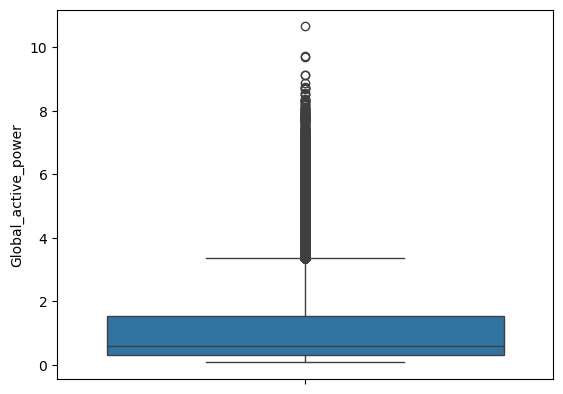

In [12]:
sns.boxplot(df['Global_active_power'])

### Exploratory Data Analysis (EDA):

#### Summary Statistics:

In [13]:
print(df.describe())

                            DateTime  Global_active_power  \
count                         204923        204923.000000   
mean   2008-12-02 21:46:06.839056384             1.093833   
min              2006-12-16 17:35:00             0.078000   
25%              2007-12-12 08:45:00             0.310000   
50%              2008-12-01 02:58:00             0.604000   
75%              2009-11-23 08:30:00             1.530000   
max              2010-11-26 20:47:00            10.650000   
std                              NaN             1.058912   

       Global_reactive_power        Voltage  Global_intensity  Sub_metering_1  \
count          204923.000000  204923.000000     204923.000000   204923.000000   
mean                0.124067     240.843703          4.637612        1.134158   
min                 0.000000     224.670000          0.200000        0.000000   
25%                 0.048000     239.000000          1.400000        0.000000   
50%                 0.100000     241.020000  

#### Visualize Data Distribution:

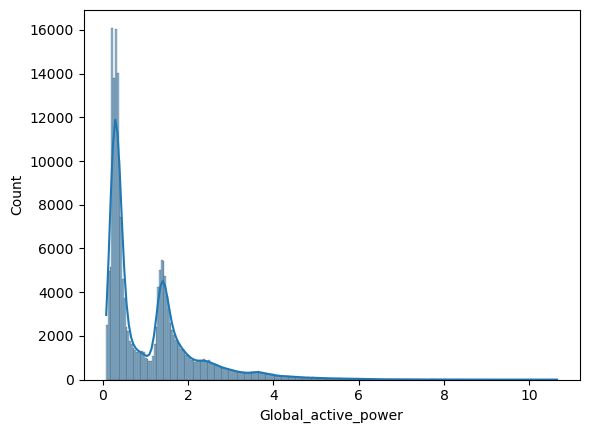

In [14]:
sns.histplot(df['Global_active_power'], kde=True)
plt.show()

#### Correlation Analysis:

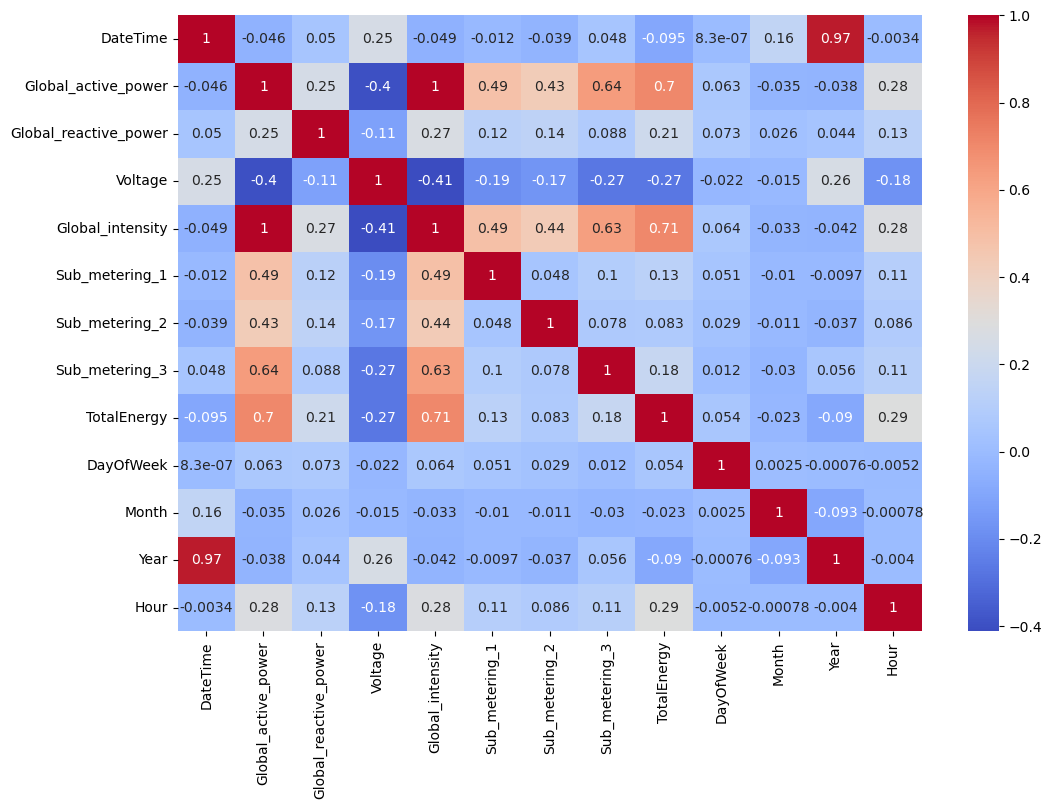

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 10})
plt.show()

#### Temporal Analysis:

HOUR OF THE DAY

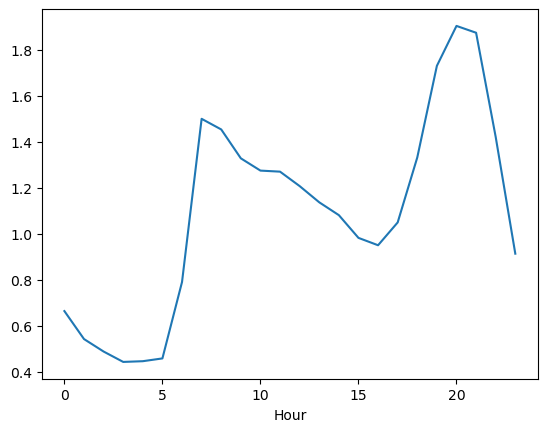

In [16]:
# Analyze energy consumption patterns over time (hourly, daily, monthly)
df.groupby('Hour')['Global_active_power'].mean().plot()
plt.show()

DAY OF THE WEEK

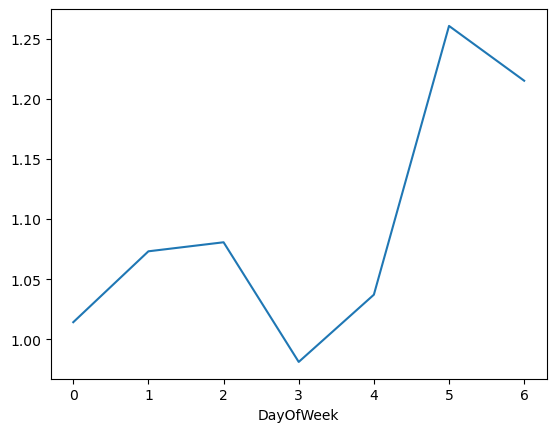

In [17]:
df.groupby('DayOfWeek')['Global_active_power'].mean().plot()
plt.show()

Place holder for now

### Clustering (Customer Segmentation)

Now that the data is preprocessed and scaled (except for the submetering columns), we’ll use clustering algorithms to group customers into segments based on their energy consumption patterns. For this project, we’ll use the K-means clustering algorithm, which is one of the most popular unsupervised learning techniques for segmentation.

#### Choose the Number of Clusters (k):

Before applying K-means, we need to determine the optimal number of clusters (k). We’ll use the Elbow Method and Silhouette Score to decide the best value of k.

- Elbow Method:
  - The Elbow Method involves plotting the Within-Cluster-Sum of Squared Errors (WCSS) against the number of clusters (k).
  - The "elbow" point (where the WCSS starts to decrease more slowly) indicates the optimal number of clusters.

- Silhouette Score:
  - The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.
  - We’ll calculate the Silhouette Score for different values of k and choose the one with the highest score.


#### 1. Elbow Method:

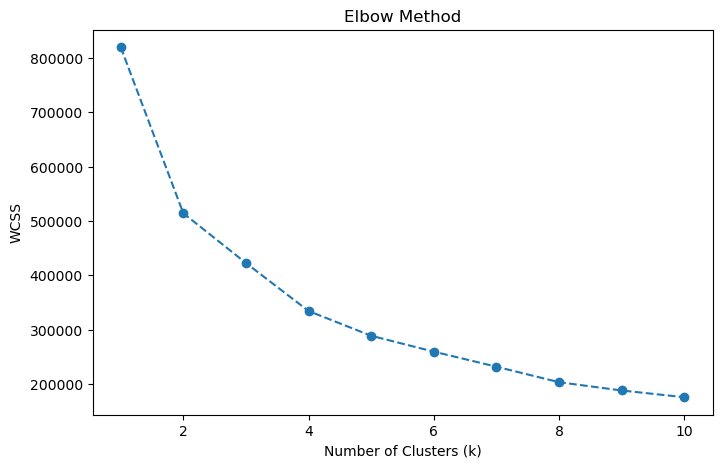

In [18]:

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):  # Test k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

#### 2.Silhouette Score:

In [19]:
# Use a sample of the data to speed up silhouette score computation
sample_size = 10000
if len(df_scaled) > sample_size:
    np.random.seed(42)
    df_sample = df_scaled[np.random.choice(df_scaled.shape[0], sample_size, replace=False)]
else:
    df_sample = df_scaled.copy()

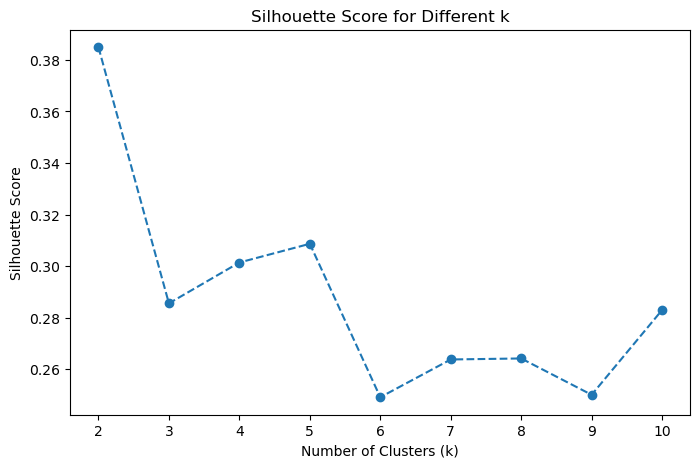

In [20]:

# Calculate silhouette scores for different values of k
silhouette_scores = []
for k in range(2, 11):  # Test k values from 2 to 10
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    cluster_labels = minibatch_kmeans.fit_predict(df_sample)
    silhouette_avg = silhouette_score(df_sample, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()

Based on the outputs provided:

1. **Elbow Method**: The WCSS values decrease as the number of clusters increases. The "elbow" point is typically where the rate of decrease slows down significantly. From the WCSS values, it looks like the elbow point is around **k = 4**.

2. **Silhouette Score**: The silhouette scores for different values of k are as follows:
    - k=2: 0.3848799451265808
    - k=3: 0.2855700463162848
    - k=4: 0.3014150012616519
    - k=5: 0.3086695034484047

    The highest silhouette score is for **k = 2** (0.38487994512658086), but considering both the elbow method and silhouette score, **k = 4** is a reasonable choice as it balances both methods.

#### Apply K-means Clustering:

After determining the optimal number of clusters (k), apply K-means to the scaled data.

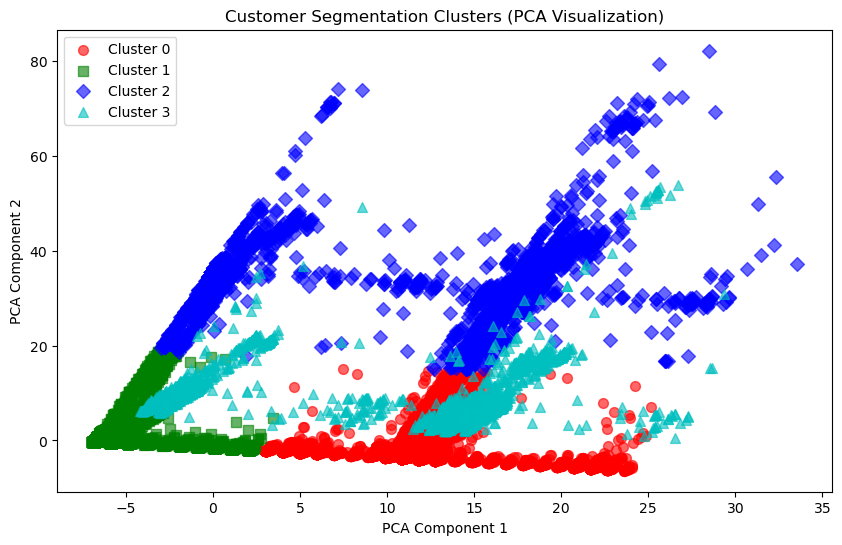

In [23]:
# Apply MiniBatchKMeans with K=4
optimal_k = 4
mbkmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=1000)
clusters = mbkmeans.fit_predict(df_scaled)

# Convert df_scaled back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'])
df_scaled['Cluster'] = clusters

# Add the sub_metering columns to df_scaled
df_scaled['Sub_metering_1'] = df['Sub_metering_1'].values
df_scaled['Sub_metering_2'] = df['Sub_metering_2'].values
df_scaled['Sub_metering_3'] = df['Sub_metering_3'].values

# Select features for clustering
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
            'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Reduce Dimensions Using PCA for Visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled[features])
df_scaled["PCA1"] = df_pca[:, 0]
df_scaled["PCA2"] = df_pca[:, 1]

# Plot the Clusters
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c']
markers = ['o', 's', 'D', '^']
for cluster in range(optimal_k):
    subset = df_scaled[df_scaled["Cluster"] == cluster]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=f"Cluster {cluster}", alpha=0.6, 
                color=colors[cluster], marker=markers[cluster], s=50)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segmentation Clusters (PCA Visualization)")
plt.legend()
plt.show()


In [ ]:
DATA DICTONARY
1. Date: Date in format dd/mm/yyyy
2. Time: time in format hh:mm:ss
3. Global_active_power: household global minute-averaged active power (in kilowatt)
4. Global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. Voltage: minute-averaged voltage (in volt)
6. Global_intensity: household global minute-averaged current intensity (in ampere) 
7. Sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven, and a microwave (hot plates are not electric but gas powered).
8. Sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator, and a light.    
9. 

Analyze the Clusters

In [24]:
# Merge the 'Cluster' column from df_scaled into df
df['Cluster'] = df_scaled['Cluster']

# Group by cluster and calculate mean values for each feature
cluster_summary = df.groupby('Cluster').mean()

# Display the cluster summary
print(cluster_summary)

                             DateTime  Global_active_power  \
Cluster                                                      
0.0     2008-12-04 21:22:56.873398272             1.093844   
1.0     2008-12-01 19:11:53.441029888             1.093789   
2.0     2008-12-09 19:22:57.243243264             1.094193   
3.0     2008-12-01 09:25:11.285779200             1.106642   

         Global_reactive_power     Voltage  Global_intensity  Sub_metering_1  \
Cluster                                                                        
0.0                   0.124243  240.838237          4.637317        1.127813   
1.0                   0.124013  240.845015          4.637219        1.145047   
2.0                   0.125756  240.850350          4.643532        1.004865   
3.0                   0.124185  240.879291          4.696865        1.116992   

         Sub_metering_2  Sub_metering_3  TotalEnergy  DayOfWeek     Month  \
Cluster                                                              

#### Visualize the Clusters

Pair Plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of features for visualization
sns.pairplot(df, hue='Cluster', vars=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'])
plt.show()

KeyboardInterrupt: 

PCA for Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Add PCA components to the DataFrame for visualization
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Plot the clusters in 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters in 2D PCA Space')
plt.show()